# INSURANCE FORECAST

### Importing the libraries

In [28]:
import pandas as pd #importing dataset
import numpy as np  #maths related to arrays
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### Reading and understanding the dataset

In [2]:
data = pd.read_csv("Insurance.csv") #reading the dataset 
data.head(5) #displaying the first 5 rows of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.tail(5) #displaying the last 5 rows of the dataset

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
data.info() #shows the data type and the count of non-null values of the attributes of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()  #gives the statistical information such as count, mean, std, min etc of the numerical attributes in our data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.describe(include="object") #gives statistical information about the categorical attributes in our data

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
data.shape #gives the number of rows and columns in our dataset

(1338, 7)

###  Removing duplicate rows

In [8]:
data.duplicated().sum() #shows there is one duplicate row

1

In [9]:
duplicate = data[data.duplicated()] #gives the row which has a true value in data.duplicate(), ie the duplicate row
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
data = data.drop_duplicates() #deleting the duplicate row, ie row with index=581
data.head(583) #the required row gets deleted

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
578,52,male,30.200,1,no,southwest,9724.53000
579,25,female,23.465,0,no,northeast,3206.49135
580,59,male,25.460,1,no,northeast,12913.99240
582,39,male,45.430,2,no,southeast,6356.27070


In [11]:
data.duplicated().sum() #now the sum = 0, therefore all the duplicates have been removed

0

###  Dealing with missing values

In [12]:
data.isnull().sum() #there are no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###  Detecting outliers

<Axes: xlabel='charges', ylabel='bmi'>

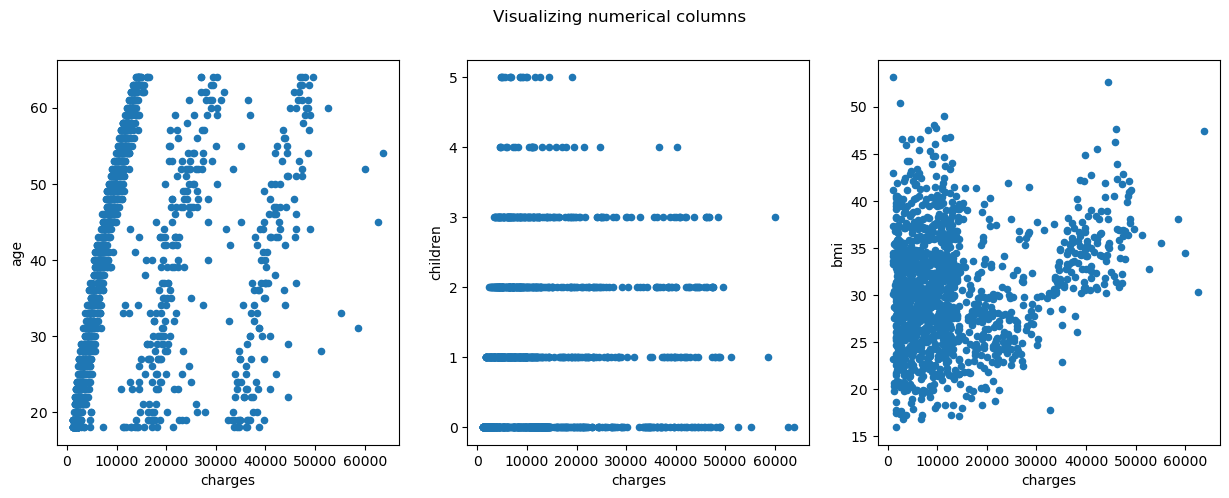

In [13]:
fig, axes = plt.subplots(1,3, figsize=(15,5)) #plotting 3 subplots representing the scatter plots for numerical features vs charges
fig.suptitle('Visualizing numerical columns')
data.plot.scatter(x='charges', y='age', ax=axes[0]) #scatterplot 1
data.plot.scatter(x='charges', y='children', ax=axes[1]) #scatterplot 2
data.plot.scatter(x='charges', y='bmi', ax=axes[2]) #scatterplot 3

<Axes: xlabel='region', ylabel='charges'>

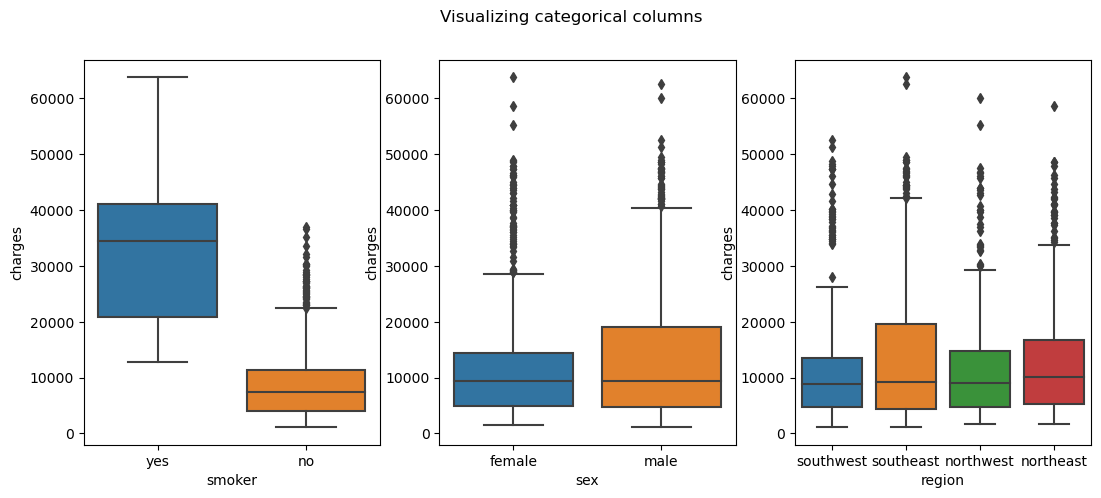

In [14]:
fig, axes = plt.subplots(1,3, figsize=(13,5)) #plotting 3 subplots representing the scatter plots for categorical features vs charges
fig.suptitle('Visualizing categorical columns')
sns.boxplot(x='smoker', y= 'charges', data=data, ax=axes[0]) #boxplot 1
sns.boxplot(x='sex', y= 'charges', data=data, ax=axes[1]) #boxplot 2
sns.boxplot(x='region', y= 'charges', data=data, ax=axes[2]) #boxplot 3

There are some outliers, but since the size of the dataset is not very large, and not all outliers need to be discarded, so we don't remove the outliers.

### Visualization of data

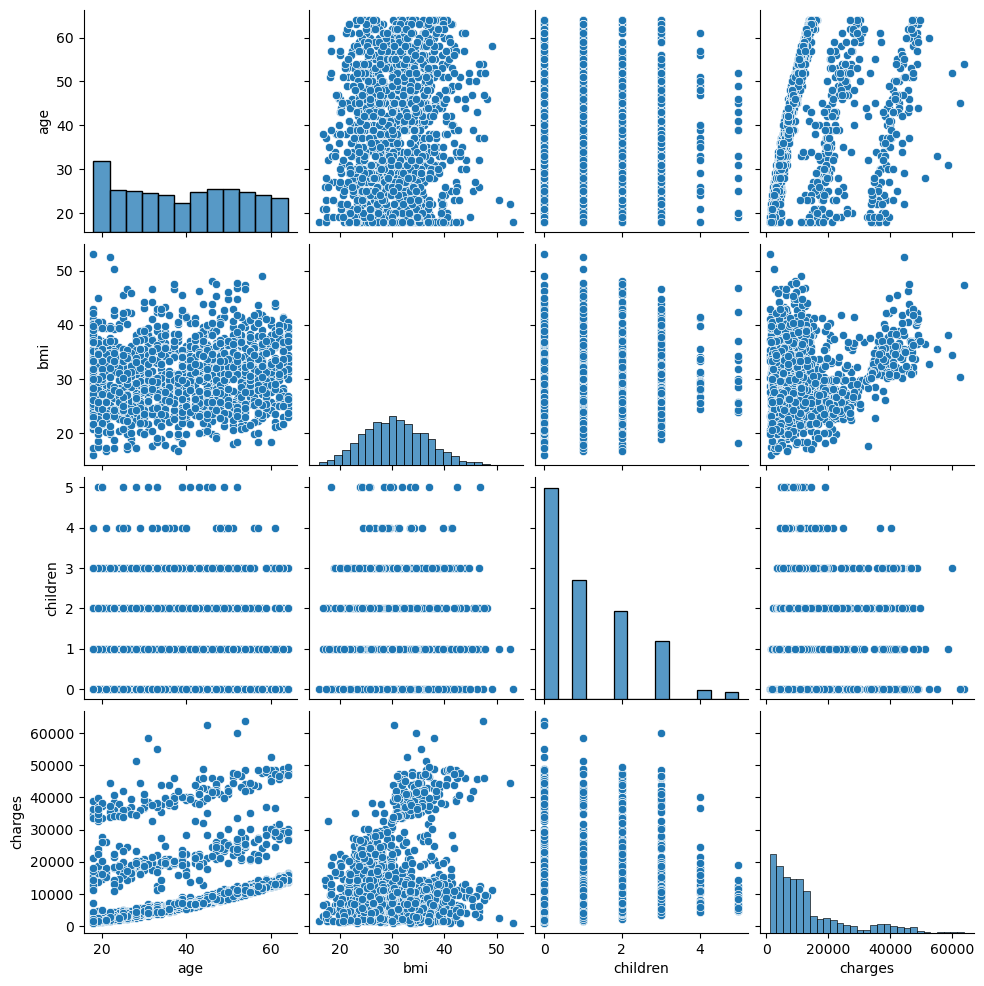

In [15]:
sns.pairplot(data)

Text(0.5, 1.0, 'Smoker Distribution')

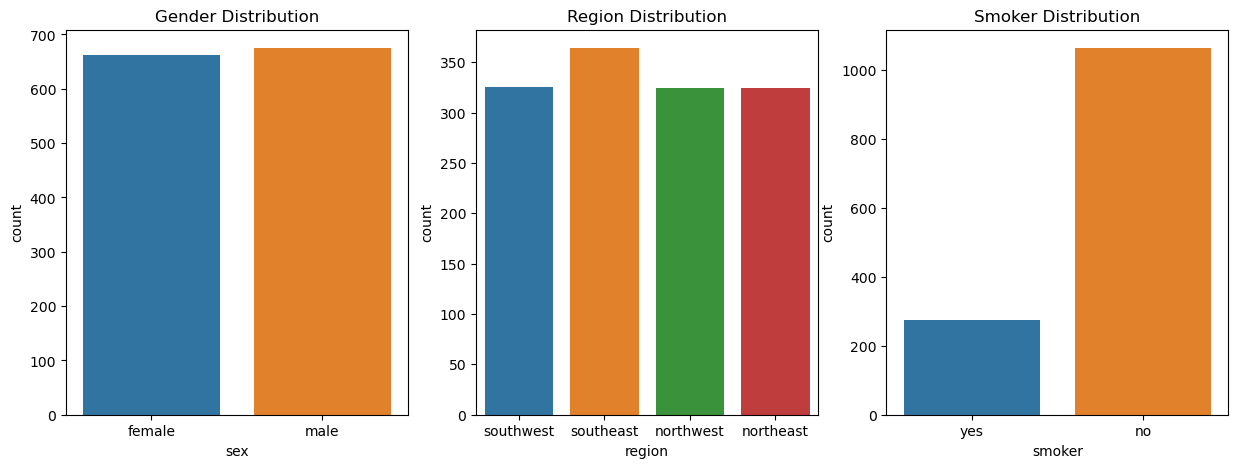

In [16]:
fig, axes = plt.subplots(1,3, figsize=(15,5)) #plotting countplots for categorical features
p1=sns.countplot(x='sex',data=data, ax=axes[0]) #countplot 1
p1.set_title("Gender Distribution")
p2=sns.countplot(x='region',data=data, ax=axes[1]) #countplot 2
p2.set_title("Region Distribution")
p3=sns.countplot(x='smoker',data=data, ax=axes[2]) #countplot 3
p3.set_title("Smoker Distribution")

C:\Users\KIIT\AppData\Local\Temp\ipykernel_2480\2220839482.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], ax=axes[0,0]) #displot 1
C:\Users\KIIT\AppData\Local\Temp\ipykernel_2480\2220839482.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'], ax=axes[0,1]) #displot 

<Axes: xlabel='charges', ylabel='Density'>

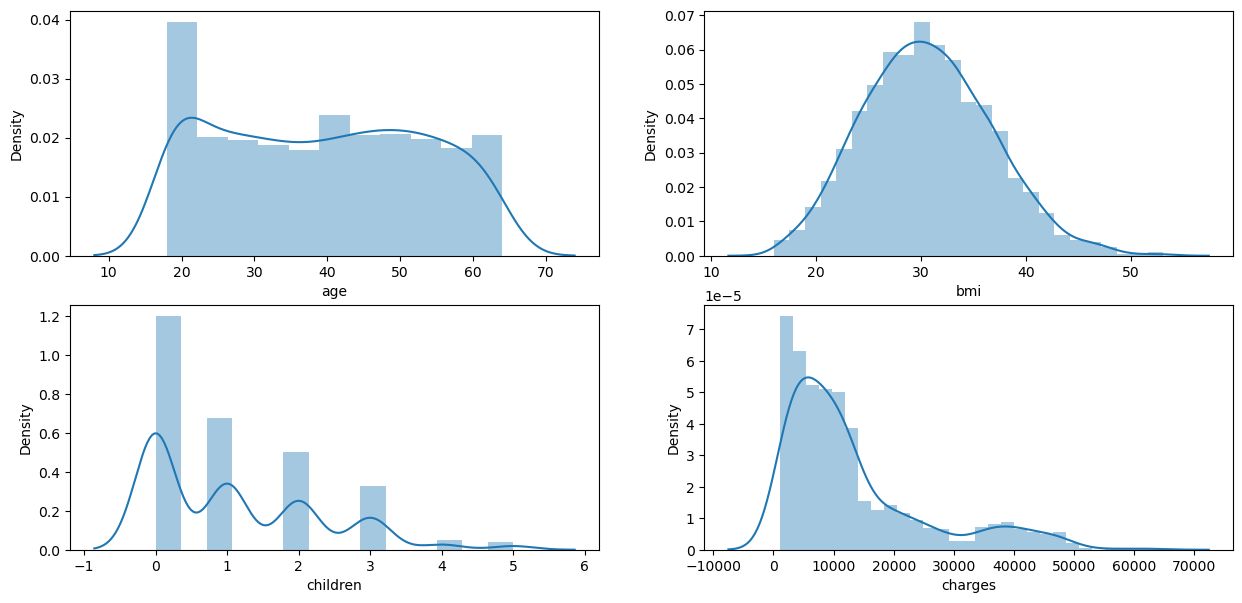

In [17]:
fig, axes = plt.subplots(2,2, figsize=(15,7)) #plotting distplots for numerical features
sns.distplot(data['age'], ax=axes[0,0]) #displot 1
sns.distplot(data['bmi'], ax=axes[0,1]) #displot 2
sns.distplot(data['children'], ax=axes[1,0]) #displot 3
sns.distplot(data['charges'], ax=axes[1,1]) #displot 4

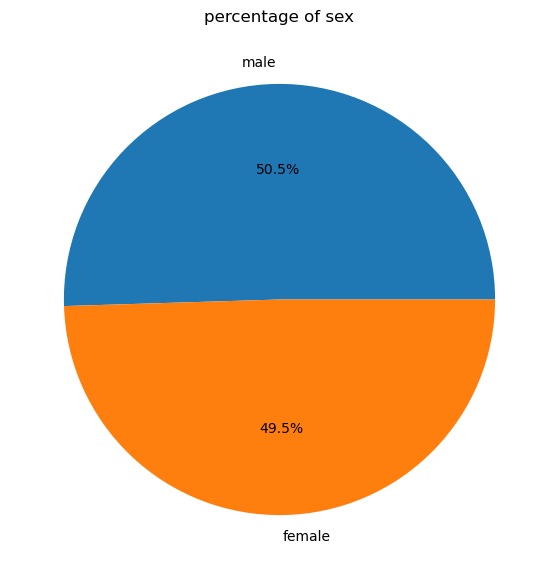

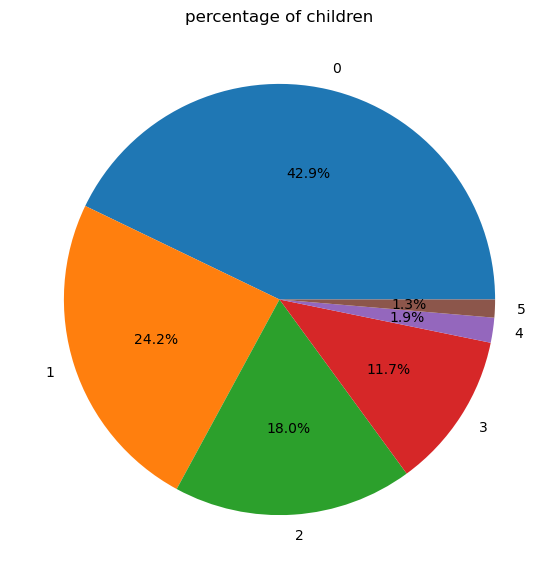

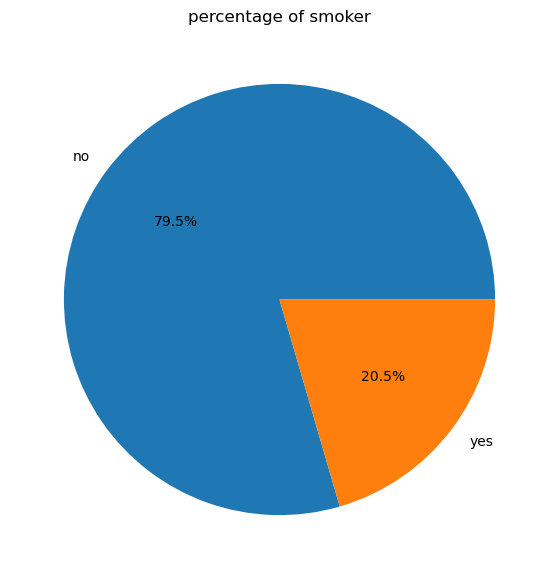

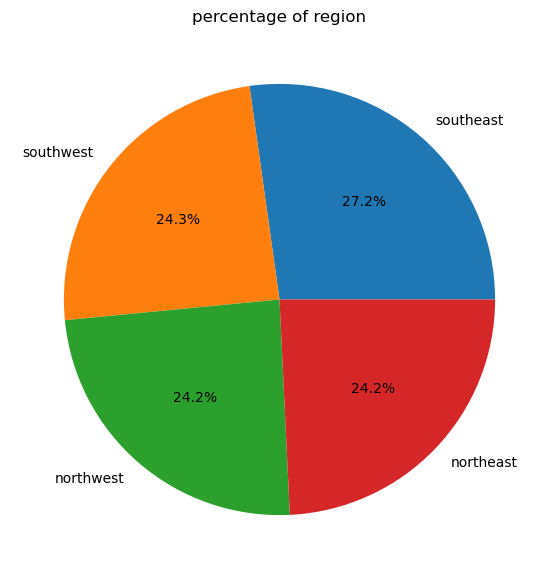

In [18]:
features = ['sex','children', 'smoker', 'region'] #making a list of features to be showed in a pie plot
for c in features :
    s = data[c].value_counts() #storing the count of each unique type in an attribute
    plt.figure(figsize=(7,7)) #determining the pie plot size
    plt.pie(s, labels=s.index, autopct='%1.1f%%') #autopct determines the data type of % values
    plt.title(f'percentage of {c}')
    plt.show()

Some observations: 
1. There are 1% more males than the females.
2. Most people don't have children and 1.3% have 5 children.
3. Most of the people are not smokers, and 20.5% are.
4. Southeast region has highest percentage of 27.2% whereas northwest and northeast regions have the same percentage.

### Categorical Features Encoding 

In [19]:
#Label encoding is a technique to convert categorical data into numerical ones, so that they can be fitted by machine learning models which accept only numerical data
label_encoder = preprocessing.LabelEncoder() #this is creating an instance of the LabelEncoder class from the preprocessing module of the scikit-learn library
data['region'] = label_encoder.fit_transform(data['region']) #the numerical values are mapped to the categorical values and the categorical attribute of the dataframe is transformed
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data.head() #displays the first 5 rows of the dataframe showing the categorical features being changed to numerical features

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Finding correlations

<Axes: >

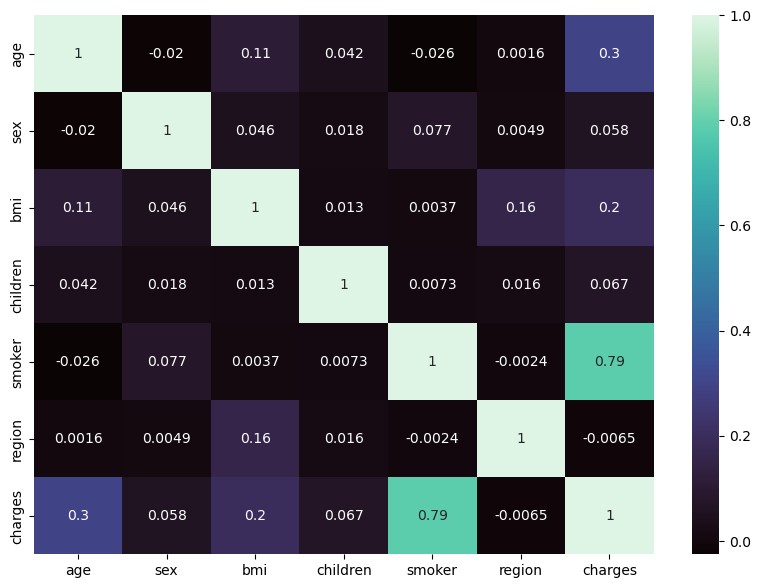

In [20]:
# We create a heatmap visualization of the correlation matrix. 
#Heatmaps are graphical representations of data where individual values in a matrix are represented as colors. In the context of a correlation matrix, a heatmap can provide insights into how variables are related to each other.
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap="mako") 
#data.corr() calculates the correlation matrix of the columns in a dataframe
#annot=True adds numerical values to the heatmap cells. Each cell will display the correlation coefficient value, indicating the strength and direction of the correlation between the corresponding variables
#cmap="mako" changes the default ("rokcet") color palatte to the present one

We see that, the charges are highly correlated with smoker. Second feature that's strongly related to charges is age.

## Linear Regression

### Setting variables x and y 

In [24]:
x = data.drop(['charges', 'sex'], axis=1)
x

,age,bmi,children,smoker,region
0,19,27.900,0,1,3
1,18,33.770,1,0,2
2,28,33.000,3,0,2
3,33,22.705,0,0,1
4,32,28.880,0,0,1
...,...,...,...,...,...
1333,50,30.970,3,0,1
1334,18,31.920,0,0,0
1335,18,36.850,0,0,2
1336,21,25.800,0,0,3


In [22]:
y = data.charges
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

### Splitting dataset into train and test set

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) 
#we split the dataset  into train and test sets. test_size=0.3 shows that 30% of the data will be used for testing, and the remaining 70% will be used for training
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (935, 5)
x_test shape:  (402, 5)
y_train shape:  (935,)
y_test shape:  (402,)


### Training and predicting 

In [32]:
linreg = LinearRegression() #creating an instance of LinearRegression class
linreg.fit(x_train, y_train) #this fits (trains) the linear regression model using the training data, where x_train is the feature matrix of the training set, and y_train is the corresponding target vector.
predicted_values = linreg.predict(x_test) #this uses the trained linear regression model to make predictions on the test data. x_test is the feature matrix of the testing set. The predicted values are stored in the predicted_values variable

### Plotting a scatter plot for the actual and the predicted values of charges

Text(0, 0.5, 'Predicted Values')

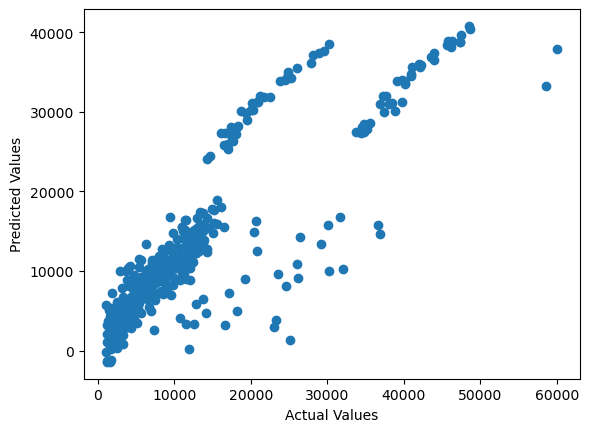

In [33]:
plt.scatter(y_test, predicted_values)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

### Performance Metrics 

1. R SQUARED - It is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables. A higher value of R2 is desirable as it indicates better results.

In [39]:
from sklearn.metrics import r2_score
print("R2 score: ",(r2_score(y_test, predicted_values)))

R2 score:  0.7525328399952855


2. ROOT MEAN SQUARED ERROR (RMSE) - It shows how far predictions fall from measured true values using Euclidean distance.

In [48]:
from sklearn.metrics import mean_squared_error
import math
mse = math.sqrt(mean_squared_error(y_test, predicted_values))
print('Root mean square error', mse)

Root mean square error 5996.259734366534


3. MEAN ABSOLUTE ERROR (MAE) - It is measured as the average absolute difference between the predicted values and the actual values and is used to assess the effectiveness of a regression model.

In [49]:
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, predicted_values)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 4038.1129093224563


### Predicting the charges for new input

In [37]:
new = {'age':37, 'bmi':22, 'children':3, 'smoker':1, 'region':3} #taking a new data object as dictionary input
index = [0] #assigning the index as 0
df = pd.DataFrame(new, index) #converting the dictionary into a dataframe
df #printing the dataframe

,age,bmi,children,smoker,region
0,37,22,3,1,3


In [38]:
charges_pred = linreg.predict(df)
print("The medical insurance cost of the new customer is: ", charges_pred)

The medical insurance cost of the new customer is:  [29147.50641109]
